In [36]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [37]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 16



In [38]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)



In [39]:
train_generator = train_datagen.flow_from_directory(
    "Potato",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
)



Found 1722 images belonging to 3 classes.


In [43]:


validation_generator = train_datagen.flow_from_directory(
    "Potato",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
)


Found 430 images belonging to 3 classes.


In [44]:

class_names = train_generator.class_indices
print(class_names)

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [46]:

# Model Definition
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax'),
])



In [47]:
# Model Compilation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [48]:
# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)



Epoch 1/16
53/53 [==============================] - 47s 870ms/step - loss: 0.8541 - accuracy: 0.5645 - val_loss: 0.6658 - val_accuracy: 0.7548
Epoch 2/16
53/53 [==============================] - 46s 858ms/step - loss: 0.5619 - accuracy: 0.7793 - val_loss: 0.4191 - val_accuracy: 0.8389
Epoch 3/16
53/53 [==============================] - 46s 862ms/step - loss: 0.2930 - accuracy: 0.8876 - val_loss: 0.3643 - val_accuracy: 0.8486
Epoch 4/16
53/53 [==============================] - 46s 873ms/step - loss: 0.2326 - accuracy: 0.9071 - val_loss: 0.2184 - val_accuracy: 0.9087
Epoch 5/16
53/53 [==============================] - 47s 882ms/step - loss: 0.2536 - accuracy: 0.9030 - val_loss: 0.1738 - val_accuracy: 0.9351
Epoch 6/16
53/53 [==============================] - 47s 883ms/step - loss: 0.1348 - accuracy: 0.9485 - val_loss: 0.1598 - val_accuracy: 0.9447
Epoch 7/16
53/53 [==============================] - 47s 883ms/step - loss: 0.1257 - accuracy: 0.9503 - val_loss: 0.1023 - val_accuracy: 0.9639

In [49]:
# Model Evaluation
scores = model.evaluate(validation_generator)
print("Validation Loss:", scores[0])
print("Validation Accuracy:", scores[1])



14/14 [==============================] - 6s 434ms/step - loss: 0.0810 - accuracy: 0.9674
Validation Loss: 0.08098852634429932
Validation Accuracy: 0.9674418568611145


In [12]:
# Saving the Model
model.save("potatoemodelnew.h5")


C:\Users\Kusal\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


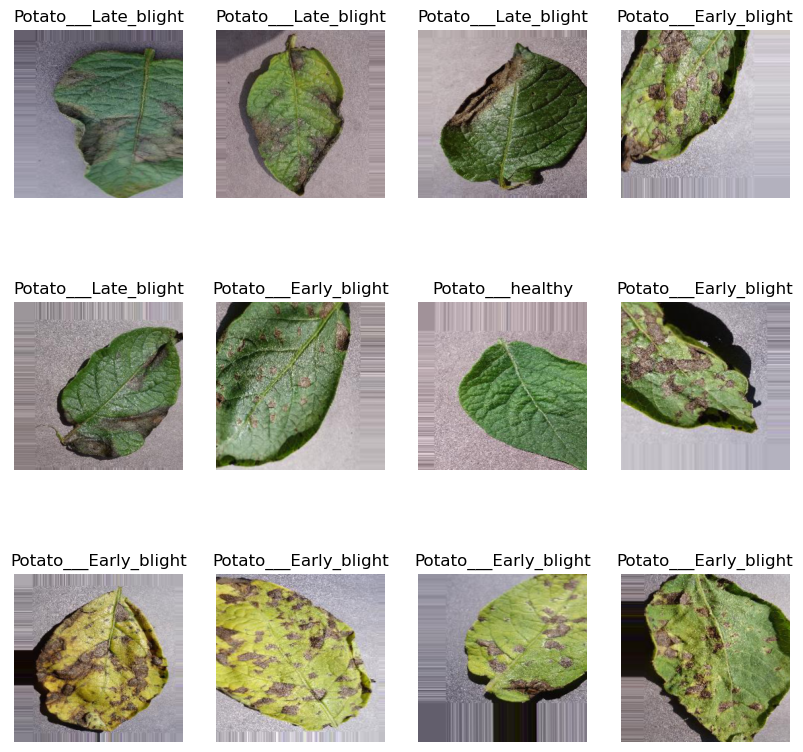

In [50]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_generator:
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow((image_batch[i] * 255).astype(int))  # Rescale and convert to integers
        plt.title(list(class_names.keys())[np.argmax(labels_batch[i])])
        plt.axis("off")
    break  # Only display one batch of images
plt.show()




1/1 [==============================] - 0s 86ms/step
Image: test_data\0f9c098f-a6df-4a73-8c14-8e7d4dbb1b0b___RS_Early.B 7991.JPG
Actual Label: 0f9c098f-a6df-4a73-8c14-8e7d4dbb1b0b
Predicted Label: Potato___Early_blight
Prediction Probabilities: [1.0000000e+00 1.7351391e-13 4.5688294e-37]


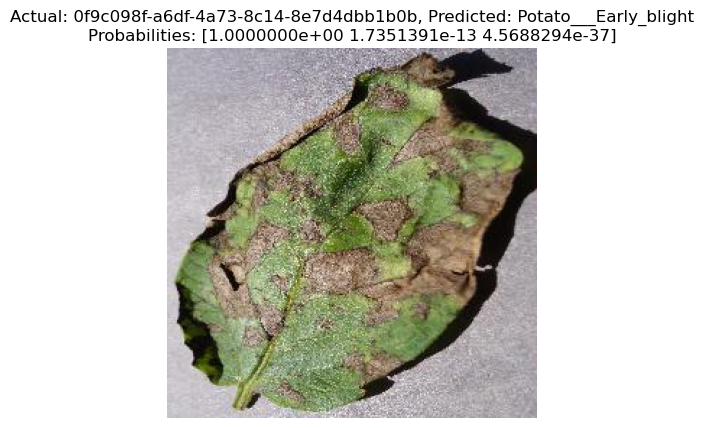

1/1 [==============================] - 0s 25ms/step
Image: test_data\1a77c047-7ed8-4f02-bfaf-a19e7a67c3dd___RS_Early.B 7076.JPG
Actual Label: 1a77c047-7ed8-4f02-bfaf-a19e7a67c3dd
Predicted Label: Potato___Early_blight
Prediction Probabilities: [1.000000e+00 1.186645e-10 5.847535e-18]


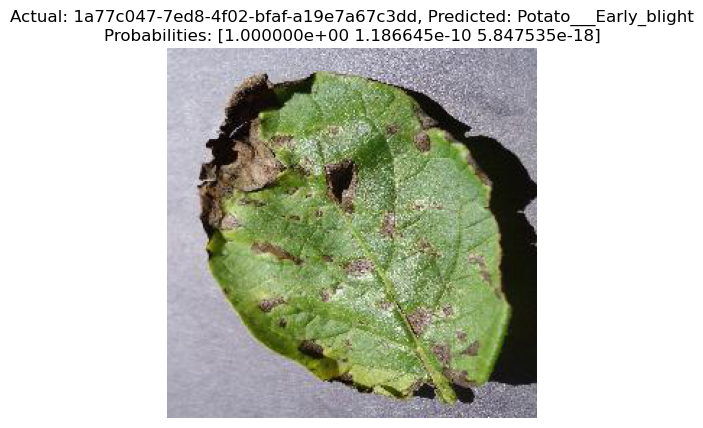

1/1 [==============================] - 0s 23ms/step
Image: test_data\0f6eac3b-d674-4c4d-ab3a-88689feec07f___RS_LB 5232.JPG
Actual Label: 0f6eac3b-d674-4c4d-ab3a-88689feec07f
Predicted Label: Potato___Late_blight
Prediction Probabilities: [8.3751045e-02 9.1624093e-01 8.0815216e-06]


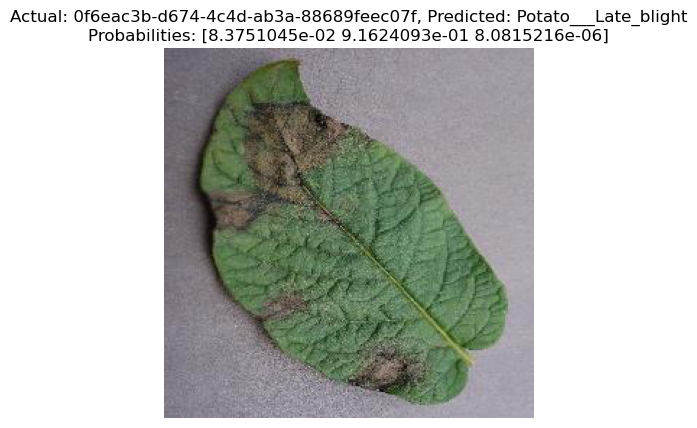

1/1 [==============================] - 0s 24ms/step
Image: test_data\3c0d6888-c7e1-4cf8-9c25-9a0b8c62ba72___RS_HL 1780.JPG
Actual Label: 3c0d6888-c7e1-4cf8-9c25-9a0b8c62ba72
Predicted Label: Potato___healthy
Prediction Probabilities: [3.5145709e-05 2.2319497e-03 9.9773300e-01]


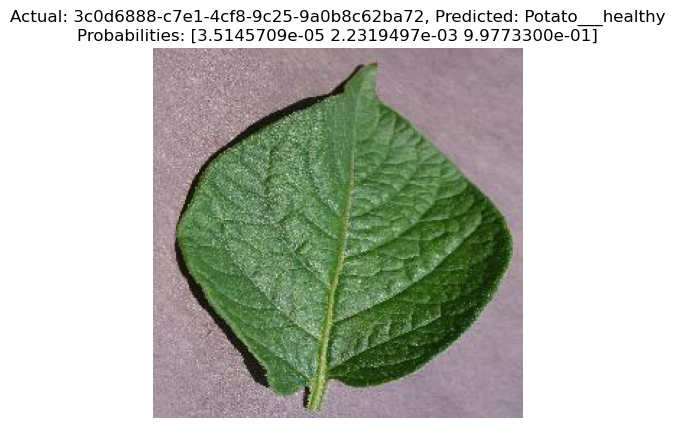

1/1 [==============================] - 0s 25ms/step
Image: test_data\0c4f6f72-c7a2-42e1-9671-41ab3bf37fe7___RS_Early.B 6752.JPG
Actual Label: 0c4f6f72-c7a2-42e1-9671-41ab3bf37fe7
Predicted Label: Potato___Early_blight
Prediction Probabilities: [9.9998832e-01 1.1221933e-05 4.2345673e-07]


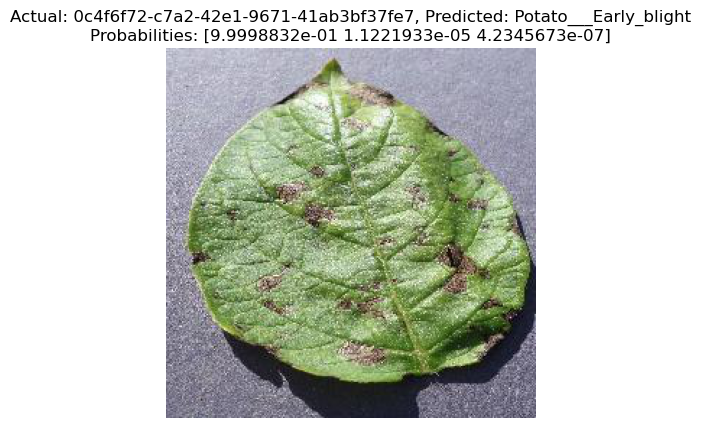

1/1 [==============================] - 0s 27ms/step
Image: test_data\0f4ebc5a-d646-436a-919d-961342997cde___RS_HL 4183.JPG
Actual Label: 0f4ebc5a-d646-436a-919d-961342997cde
Predicted Label: Potato___healthy
Prediction Probabilities: [1.4214018e-04 1.6934562e-02 9.8292333e-01]


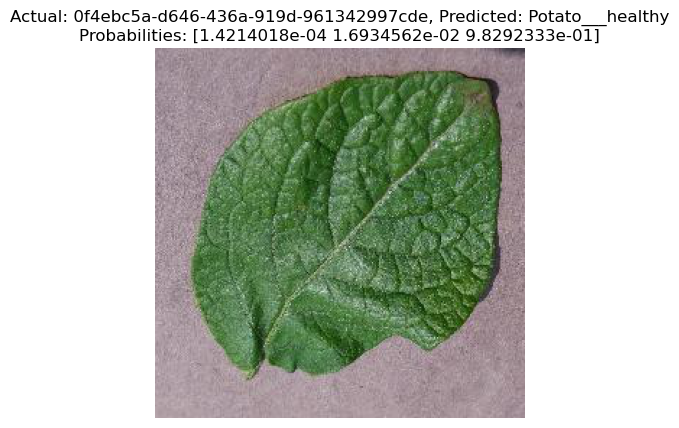

1/1 [==============================] - 0s 23ms/step
Image: test_data\0a47f32c-1724-4c8d-bfe4-986cedd3587b___RS_Early.B 8001.JPG
Actual Label: 0a47f32c-1724-4c8d-bfe4-986cedd3587b
Predicted Label: Potato___Early_blight
Prediction Probabilities: [9.9999833e-01 1.6256000e-06 1.2295776e-08]


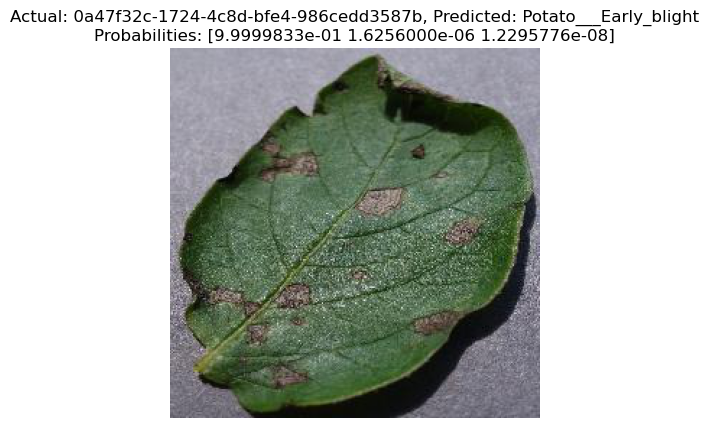

1/1 [==============================] - 0s 24ms/step
Image: test_data\1a18d84a-8811-4806-830f-d10e98b1800e___RS_LB 3919.JPG
Actual Label: 1a18d84a-8811-4806-830f-d10e98b1800e
Predicted Label: Potato___Early_blight
Prediction Probabilities: [8.5537350e-01 1.4462243e-01 4.0799450e-06]


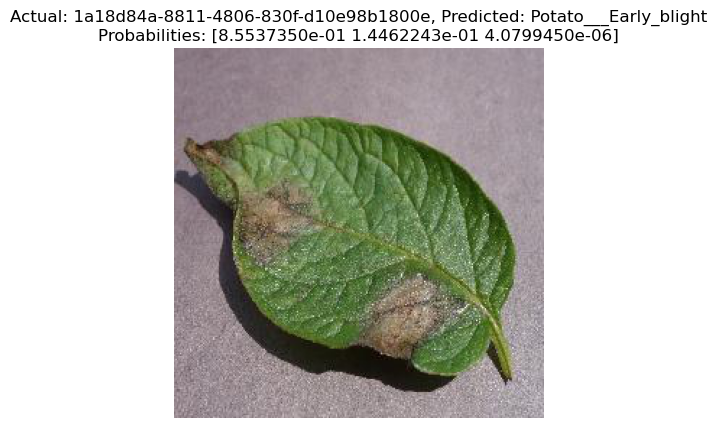

1/1 [==============================] - 0s 25ms/step
Image: test_data\0b092cda-db8c-489d-8c46-23ac3835310d___RS_LB 4480.JPG
Actual Label: 0b092cda-db8c-489d-8c46-23ac3835310d
Predicted Label: Potato___Late_blight
Prediction Probabilities: [5.7922229e-03 9.9420774e-01 1.1425974e-10]


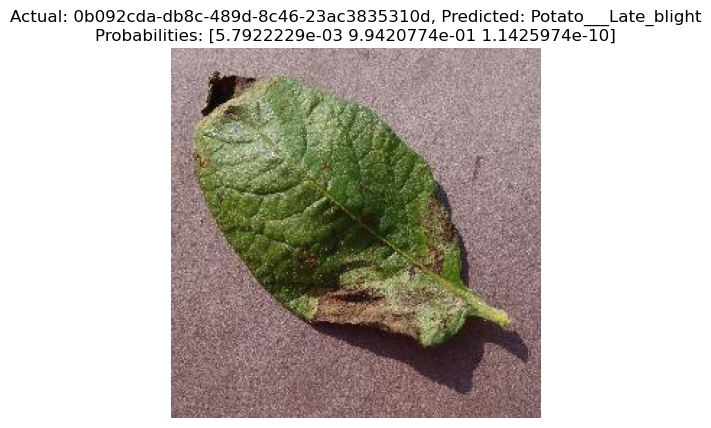

1/1 [==============================] - 0s 24ms/step
Image: test_data\00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG
Actual Label: 00d8f10f-5038-4e0f-bb58-0b885ddc0cc5
Predicted Label: Potato___Early_blight
Prediction Probabilities: [0.62388057 0.01622267 0.35989678]


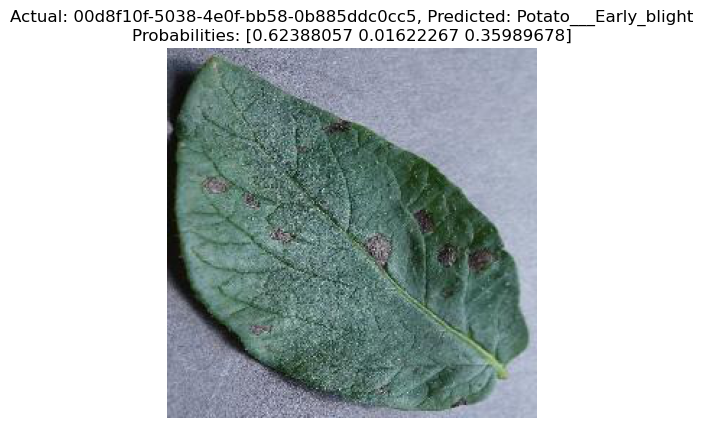

1/1 [==============================] - 0s 23ms/step
Image: test_data\potato-leaf-blight-on-maincrop-260nw-1030294573.webp
Actual Label: potato-leaf-blight-on-maincrop-260nw-1030294573.webp
Predicted Label: Potato___Early_blight
Prediction Probabilities: [1.0000000e+00 1.2612421e-09 4.5745484e-15]


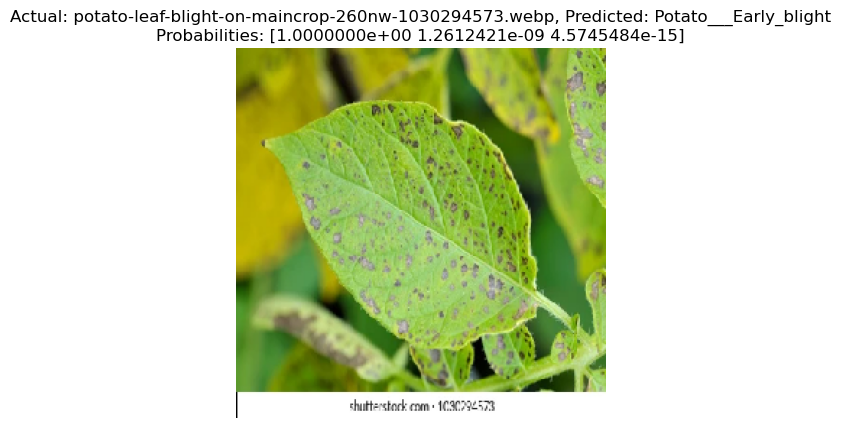

1/1 [==============================] - 0s 23ms/step
Image: test_data\1a5f4258-21df-4334-a933-2ef073c932ba___RS_LB 3089.JPG
Actual Label: 1a5f4258-21df-4334-a933-2ef073c932ba
Predicted Label: Potato___Early_blight
Prediction Probabilities: [9.9835986e-01 1.6401837e-03 4.2077821e-12]


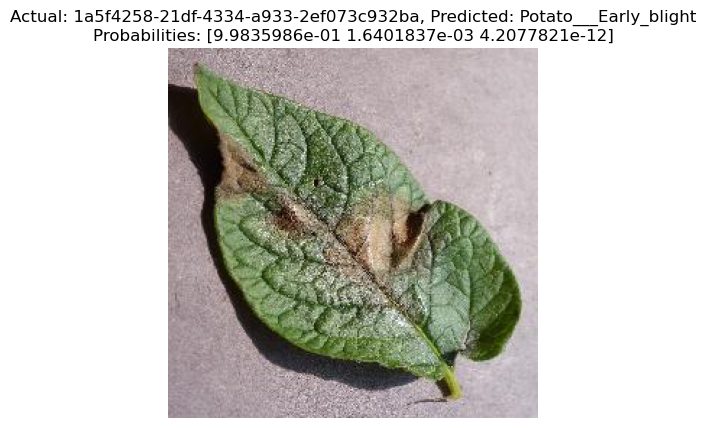

1/1 [==============================] - 0s 25ms/step
Image: test_data\irish-blight-symptoms-on-potato-leaves-ATMF8B.jpg
Actual Label: irish-blight-symptoms-on-potato-leaves-ATMF8B.jpg
Predicted Label: Potato___Early_blight
Prediction Probabilities: [1.0000000e+00 5.1026566e-14 3.5622321e-12]


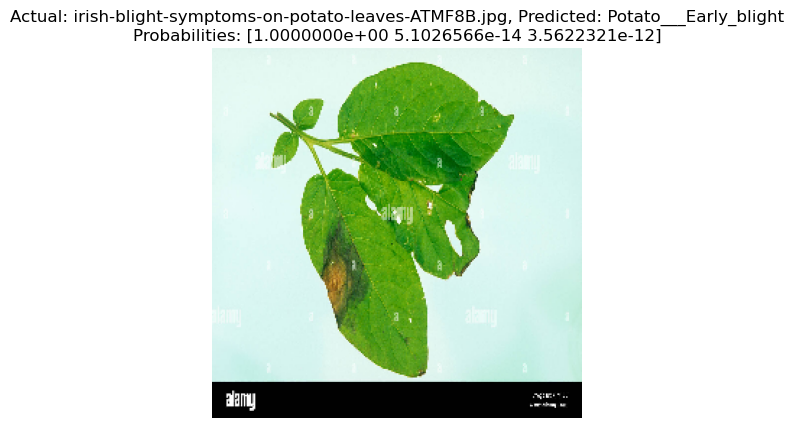

1/1 [==============================] - 0s 23ms/step
Image: test_data\0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814.JPG
Actual Label: 0be9d721-82f5-42c3-b535-7494afe01dbe
Predicted Label: Potato___healthy
Prediction Probabilities: [6.942935e-05 4.971098e-03 9.949595e-01]


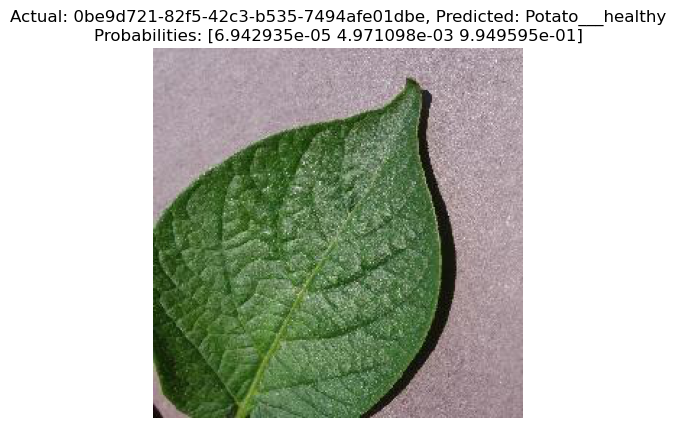

1/1 [==============================] - 0s 23ms/step
Image: test_data\2d98cbc8-cbe6-423c-b2ab-3f7f8bcea5d5___RS_HL 1945.JPG
Actual Label: 2d98cbc8-cbe6-423c-b2ab-3f7f8bcea5d5
Predicted Label: Potato___healthy
Prediction Probabilities: [7.6070987e-06 1.0354014e-03 9.9895692e-01]


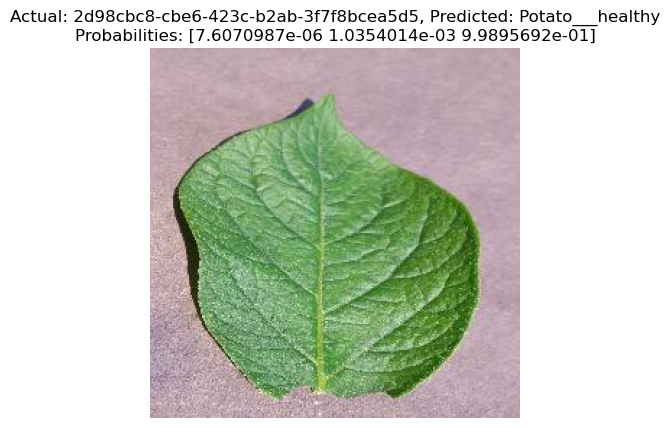

1/1 [==============================] - 0s 24ms/step
Image: test_data\2ccb9ee9-faac-4d32-9af5-29497fa2e028___RS_HL 1837.JPG
Actual Label: 2ccb9ee9-faac-4d32-9af5-29497fa2e028
Predicted Label: Potato___healthy
Prediction Probabilities: [0.00182014 0.00436438 0.99381554]


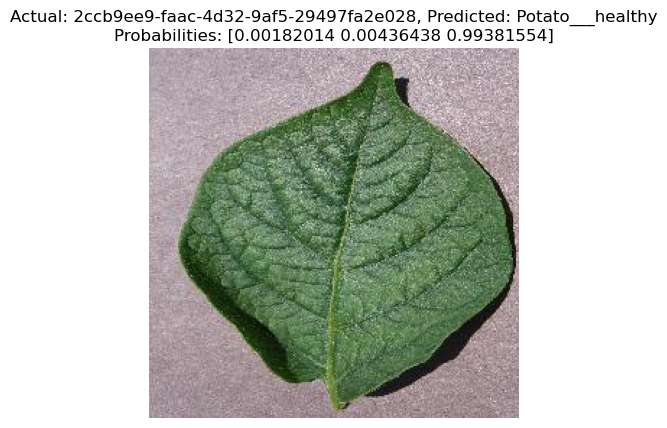

1/1 [==============================] - 0s 24ms/step
Image: test_data\0a6983a5-895e-4e68-9edb-88adf79211e9___RS_Early.B 9072.JPG
Actual Label: 0a6983a5-895e-4e68-9edb-88adf79211e9
Predicted Label: Potato___Early_blight
Prediction Probabilities: [1.0000000e+00 1.2226201e-12 8.5136224e-28]


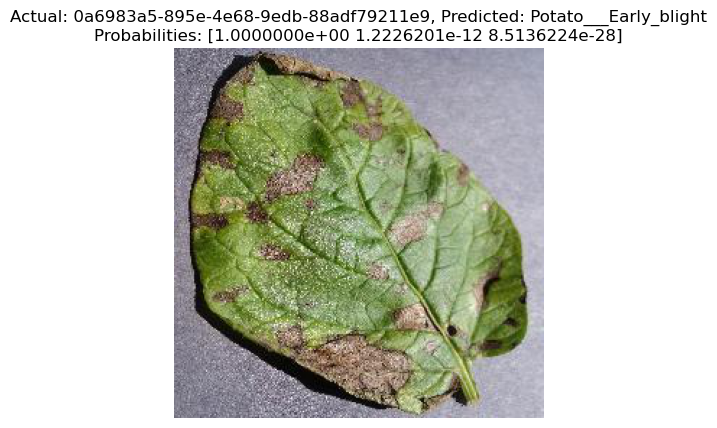

1/1 [==============================] - 0s 27ms/step
Image: test_data\0b2bdc8e-90fd-4bb4-bedb-485502fe8a96___RS_LB 4906.JPG
Actual Label: 0b2bdc8e-90fd-4bb4-bedb-485502fe8a96
Predicted Label: Potato___Early_blight
Prediction Probabilities: [0.82934815 0.16228618 0.00836563]


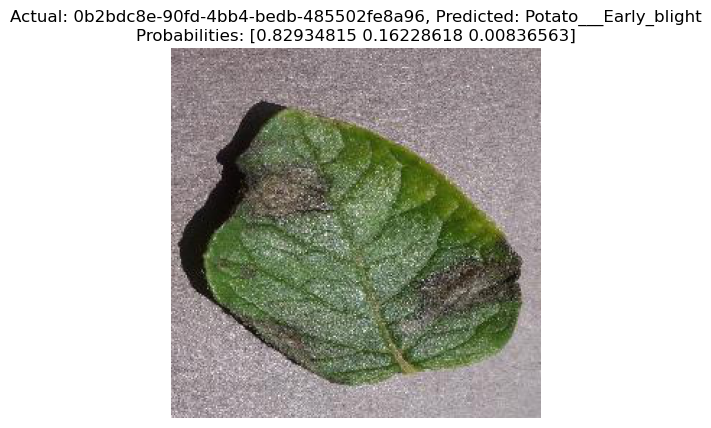

1/1 [==============================] - 0s 25ms/step
Image: test_data\0fe7786d-0e2f-4705-839d-898f1d9214b0___RS_LB 2836.JPG
Actual Label: 0fe7786d-0e2f-4705-839d-898f1d9214b0
Predicted Label: Potato___Late_blight
Prediction Probabilities: [0.01832824 0.97469115 0.00698067]


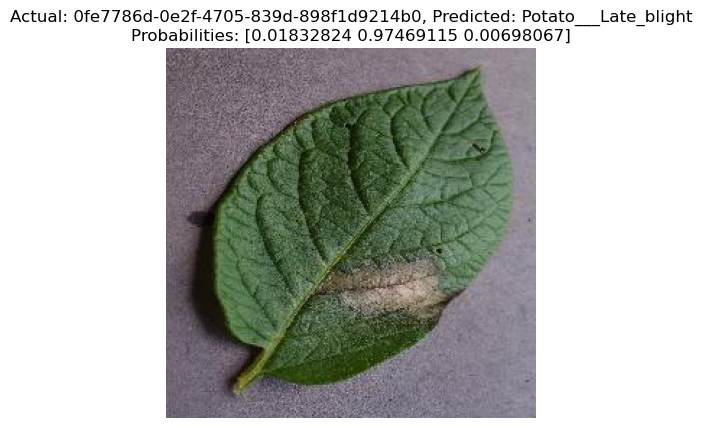

1/1 [==============================] - 0s 24ms/step
Image: test_data\0eb24a67-a174-43db-86c7-cca8795942a2___RS_LB 4722.JPG
Actual Label: 0eb24a67-a174-43db-86c7-cca8795942a2
Predicted Label: Potato___Late_blight
Prediction Probabilities: [9.0770565e-02 9.0878016e-01 4.4926672e-04]


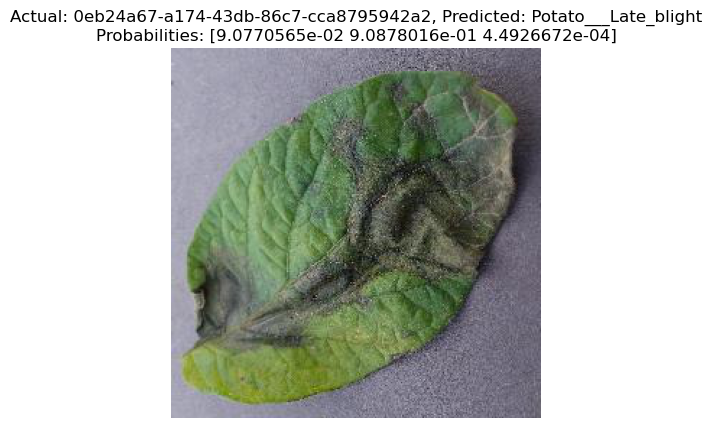

In [51]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
import random

BATCH_SIZE = 32
IMAGE_SIZE = 256

# Load the saved model
model = tf.keras.models.load_model("potatoemodelnew.h5")

# Path to the directory containing test images
test_dir = "test_data"

# Get list of test images
test_images = [os.path.join(test_dir, img) for img in os.listdir(test_dir)]

# Mapping class indices to class labels
class_labels = {0: "Potato___Early_blight", 1: "Potato___Late_blight", 2: "Potato___healthy"}  # Update with your actual class labels

# Function to preprocess image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale and expand dimensions
    return img, img_array

# Select 20 random images
random_test_images = random.sample(test_images, 20)

# Perform predictions and display images
for img_path in random_test_images:
    img, preprocessed_img = preprocess_image(img_path)
    prediction = model.predict(preprocessed_img)

    # Display image
    plt.imshow(img)
    plt.axis('off')

    # Display prediction
    actual_label = img_path.split(os.path.sep)[-1].split("_")[0]  # Extracting actual label from image file name
    predicted_label = class_labels[np.argmax(prediction)]  # Getting predicted label
    prediction_probabilities = prediction[0]
    print("Image:", img_path)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("Prediction Probabilities:", prediction_probabilities)
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}\nProbabilities: {prediction_probabilities}")
    plt.show()




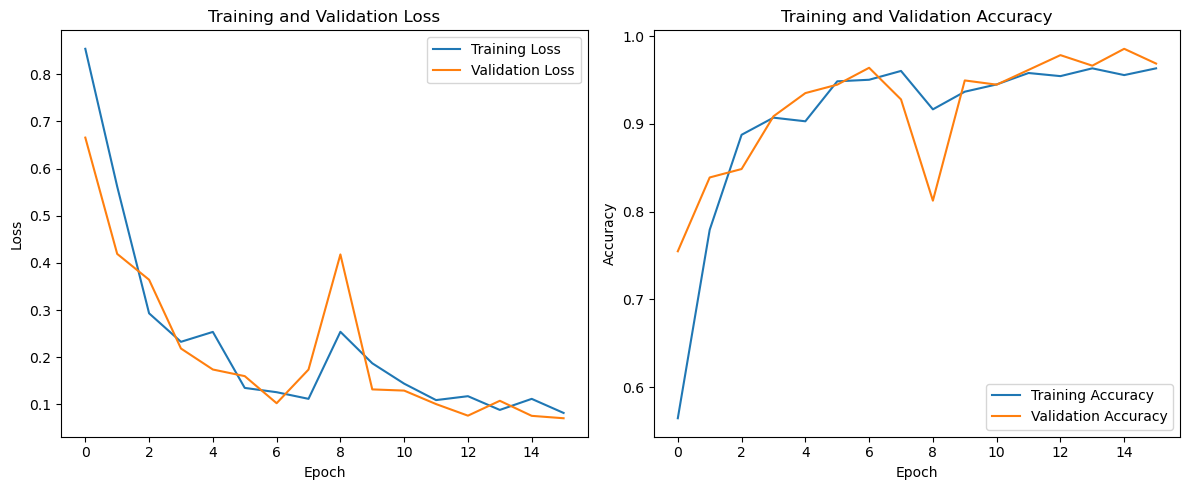

14/14 [==============================] - 6s 440ms/step


In [55]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Compute predictions and true labels for the validation set
predictions = model.predict(validation_generator)
y_true = validation_generator.classes


